In [298]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pd.options.mode.chained_assignment = None

In [299]:
player_stats = pd.read_csv('player_stats.csv')
map_pick = pd.read_csv('map_pick_stats.csv')
side_wins = pd.read_csv('side_pick_stats.csv')

In [300]:
player_stats

,Player,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,TenZ,Canada,Sentinels,"['Jett', 'Reyna', 'Raze']",9,206,139,55,1.48,1.87,289,22.8,15.4,6.1
1,ScreaM,Belgium,Team Liquid,"['Sage', 'Phoenix']",9,177,131,56,1.35,1.77,265,19.6,14.5,6.2
2,ShahZaM,United States,Sentinels,"['Sova', 'Jett']",9,172,134,52,1.28,1.67,240,19.1,14.8,5.7
3,L1NK,United Kingdom,Team Liquid,"['Brimstone', 'Omen']",9,147,123,57,1.19,1.65,218,16.3,13.6,6.3
4,Jamppi,Finland,Team Liquid,"['Jett', 'Killjoy']",9,155,130,32,1.19,1.43,229,17.2,14.4,3.5
5,Lakia,South Korea,NUTURN Gaming,"['Sova', 'Raze']",11,174,146,62,1.19,1.61,231,15.8,13.2,5.6
6,SicK,United States,Sentinels,"['Phoenix', 'Raze', 'Sova']",9,147,126,61,1.16,1.65,218,16.3,14.0,6.7
7,Mistic,United Kingdom,Fnatic,"['Viper', 'Skye']",16,240,206,120,1.16,1.74,191,15.0,12.8,7.5
8,Klaus,Argentina,KRÜ Esports,"['Killjoy', 'Skye']",6,87,75,25,1.15,1.49,234,14.5,12.5,4.1
9,Sacy,Brazil,Team Vikings,['Sova'],6,100,89,30,1.12,1.46,206,16.6,14.8,5.0


In [301]:
player_stats.shape

(50, 14)

In [302]:
player_stats.describe()

,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,8.200000,122.040000,122.120000,44.340000,0.961200,1.313400,194.260000,14.360000,14.898000,5.180000
std,3.434519,64.702762,52.722856,25.560341,0.199823,0.255436,35.490045,3.111204,1.490034,1.479244
min,4.000000,35.000000,61.000000,10.000000,0.500000,0.750000,122.000000,7.000000,12.100000,2.100000
25%,6.000000,67.750000,79.250000,25.250000,0.845000,1.135000,170.250000,12.775000,13.625000,4.000000
50%,7.500000,106.500000,108.500000,37.000000,0.975000,1.315000,190.500000,14.300000,14.800000,5.400000
75%,10.000000,157.250000,146.000000,61.000000,1.097500,1.497500,217.250000,16.250000,16.225000,6.275000
max,16.000000,298.000000,270.000000,120.000000,1.480000,1.870000,289.000000,22.800000,18.000000,8.100000


In [303]:
#How many players from each country are on the board
# country_counts = player_stats["Country"].value_counts(sort = True).head(5).tolist()
# country_names = player_stats["Country"].value_counts().head(5).index.tolist()
country_val = pd.DataFrame(player_stats["Country"].value_counts(sort=True).head(5))
country_val_reset = country_val.reset_index()
country_val_reset.columns = ['Country', '# of Players']
country_ply = country_val_reset

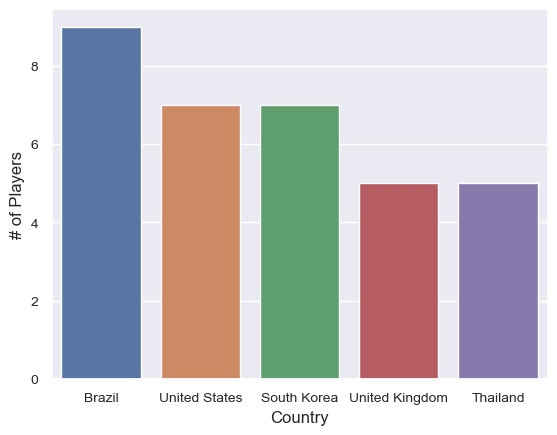

In [304]:
country_plot = sns.barplot(x='Country',y='# of Players',data=country_ply)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

In [305]:
map_pick

,Map,Total,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
0,Ascent,16,3,3,2,3,2,2,1
1,Bind,9,1,0,2,1,2,2,1
2,Haven,15,3,3,2,2,3,1,1
3,Icebox,10,2,2,3,1,1,0,1
4,Split,6,0,1,0,2,1,1,1


In [306]:
map_pick = map_pick[['Map','Total']]

In [307]:
map_pick

,Map,Total
0,Ascent,16
1,Bind,9
2,Haven,15
3,Icebox,10
4,Split,6


In [308]:
##TOP PLAYED MAPS
map_pick = map_pick.sort_values('Total', ascending=False)

In [309]:
map_pick

,Map,Total
0,Ascent,16
2,Haven,15
3,Icebox,10
1,Bind,9
4,Split,6


In [310]:
side_wins

,Map,Atk Wins,Def Wins
0,Ascent,96,130
1,Bind,74,55
2,Haven,130,105
3,Icebox,99,88
4,Split,44,53


In [311]:
side_wins['Total Wins']=side_wins['Atk Wins']+side_wins['Def Wins']

In [312]:
side_wins

,Map,Atk Wins,Def Wins,Total Wins
0,Ascent,96,130,226
1,Bind,74,55,129
2,Haven,130,105,235
3,Icebox,99,88,187
4,Split,44,53,97


In [313]:
atk_wins = side_wins[['Map','Atk Wins','Total Wins']]

In [314]:
atk_wins['Atk Wins'] = atk_wins['Atk Wins']/atk_wins['Total Wins']

In [315]:
atk_wins

,Map,Atk Wins,Total Wins
0,Ascent,0.424779,226
1,Bind,0.573643,129
2,Haven,0.553191,235
3,Icebox,0.529412,187
4,Split,0.453608,97


In [316]:
atk_wins["Atk Wins"] = atk_wins["Atk Wins"].transform(lambda x: '{:,.2%}'.format(x))

In [317]:
atk_wins

,Map,Atk Wins,Total Wins
0,Ascent,42.48%,226
1,Bind,57.36%,129
2,Haven,55.32%,235
3,Icebox,52.94%,187
4,Split,45.36%,97


In [318]:
atk_wins = atk_wins.sort_values('Atk Wins',ascending=False)

In [319]:
atk_wins=atk_wins[['Map','Atk Wins']]

In [320]:
atk_wins

,Map,Atk Wins
1,Bind,57.36%
2,Haven,55.32%
3,Icebox,52.94%
4,Split,45.36%
0,Ascent,42.48%


In [321]:
atk_wins = atk_wins.rename(columns={"Atk Wins":'Atk_Win%'})

In [322]:
#Attack Sided Maps
atk_wins

,Map,Atk_Win%
1,Bind,57.36%
2,Haven,55.32%
3,Icebox,52.94%
4,Split,45.36%
0,Ascent,42.48%


In [323]:
def_wins = side_wins[['Map','Def Wins','Total Wins']]

In [324]:
def_wins['Def Wins'] = def_wins['Def Wins']/def_wins['Total Wins']

In [325]:
def_wins['Def Wins'] = def_wins['Def Wins'].transform(lambda x: '{:,.2%}'.format(x))

In [326]:
def_wins = def_wins[['Map','Def Wins']]

In [327]:
def_wins = def_wins.sort_values('Def Wins',ascending=False)

In [328]:
def_wins = def_wins.rename(columns={"Def Wins":'Def_Win%'})

In [329]:
#Defense Sided Maps
def_wins

,Map,Def_Win%
0,Ascent,57.52%
4,Split,54.64%
3,Icebox,47.06%
2,Haven,44.68%
1,Bind,42.64%


In [330]:
player_stats

,Player,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,TenZ,Canada,Sentinels,"['Jett', 'Reyna', 'Raze']",9,206,139,55,1.48,1.87,289,22.8,15.4,6.1
1,ScreaM,Belgium,Team Liquid,"['Sage', 'Phoenix']",9,177,131,56,1.35,1.77,265,19.6,14.5,6.2
2,ShahZaM,United States,Sentinels,"['Sova', 'Jett']",9,172,134,52,1.28,1.67,240,19.1,14.8,5.7
3,L1NK,United Kingdom,Team Liquid,"['Brimstone', 'Omen']",9,147,123,57,1.19,1.65,218,16.3,13.6,6.3
4,Jamppi,Finland,Team Liquid,"['Jett', 'Killjoy']",9,155,130,32,1.19,1.43,229,17.2,14.4,3.5
5,Lakia,South Korea,NUTURN Gaming,"['Sova', 'Raze']",11,174,146,62,1.19,1.61,231,15.8,13.2,5.6
6,SicK,United States,Sentinels,"['Phoenix', 'Raze', 'Sova']",9,147,126,61,1.16,1.65,218,16.3,14.0,6.7
7,Mistic,United Kingdom,Fnatic,"['Viper', 'Skye']",16,240,206,120,1.16,1.74,191,15.0,12.8,7.5
8,Klaus,Argentina,KRÜ Esports,"['Killjoy', 'Skye']",6,87,75,25,1.15,1.49,234,14.5,12.5,4.1
9,Sacy,Brazil,Team Vikings,['Sova'],6,100,89,30,1.12,1.46,206,16.6,14.8,5.0


In [331]:
team_stats = player_stats[['Team','KDA']]

In [332]:
team_stats = team_stats.groupby(['Team']).sum()

In [333]:
##TEAM WITH THE BEST KDA
team_stats = team_stats.head().sort_values('KDA',ascending=False)

In [334]:
team_stats.reset_index(inplace=True)
team_stats

,Team,KDA
0,Sentinels,8.22
1,Fnatic,7.43
2,NUTURN Gaming,6.42
3,KRÜ Esports,6.41
4,Crazy Raccoon,5.54


In [335]:
player_kda = player_stats[['Player','KDA']]

In [336]:
##TOP 5 PLAYERS
player_kda.head()

,Player,KDA
0,TenZ,1.87
1,ScreaM,1.77
2,ShahZaM,1.67
3,L1NK,1.65
4,Jamppi,1.43


In [337]:
##MOST USED AGENTS IN THE TOURNAMENT
agents = player_stats['Agents']

In [338]:
agents_list = agents.explode().tolist()

In [339]:
agents_list = [eval(s) for s in agents_list]

In [340]:
agents_list = [character for sublist in agents_list for character in sublist]

In [341]:
agent_count = Counter(agents_list)

In [342]:
agent_used = pd.DataFrame.from_dict(agent_count, orient='index').reset_index()

In [343]:
agent_used.columns = ['Agents', 'TimesUsed']

In [344]:
agent_used = agent_used.sort_values(by = 'TimesUsed',ascending = False)

In [345]:
#Jett and Sova were the most used agents in the tournament
agent_used

,Agents,TimesUsed
0,Jett,12
5,Sova,12
8,Killjoy,11
2,Raze,10
3,Sage,10
9,Viper,10
10,Skye,9
7,Omen,8
12,Astra,7
4,Phoenix,6
